In [1]:
# changelog: added QR code for BTC donations
# Known Bugs:
#      integral(ln(x-a)), where a = constant, does not display an obvious handwritten solution. 
#      .collect() is a too specific solution

In [2]:
from sympy.simplify.fu import TR22,TR2i
from sympy import sin,cos,ln,exp,tan,Function,Derivative,Eq,Integral,sec
from sympy import factor_terms, sqrt, Symbol,pi
import random

In [3]:
f = Function('f')
g = Function('g')
h = Function('h')
theta = Symbol('theta')
y = Symbol('y')
i = 0
dkeywords = {"polylog","Ei","gamma","Piecewise","li","erf","atan","Si","Ci","hyper","fresnel","Li","expint","zoo",
"nan","oo","I","abs","re","EulerGamma", "sinh","tanh", "cosh","cot","csc"} 
ikeywords = {"polylog","Ei","gamma","Piecewise", "li", "erf", "atan", "Si",  "Ci",  "hyper",  "fresnel",  "Li", 
"expint","zoo", "nan", "oo","EulerGamma","sinh","csc"}
keywords2 = {"sin","cos","sec","tan"}

In [4]:
def random_value(i):
    return random.choice([i for i in range(-5,6) if i not in [0]])

In [38]:
def random_variable(i):
    return Symbol(random.choice([i for i in ['v','t','x','z']]), real=True)
a = random_variable(i)
b = random_variable(i)

In [39]:
def random_value2(i):
    return random.choice([i for i in range(1,7)])

In [40]:
def dmain(a):
    def random_math(a): 
        def power(a):      
            return a**random_value(i)
        def scalar(a):       
            return a*random_value(i)
        def addSUBTR(a):     
            return a+random_value(i)
        funs = [power,power,power,scalar,scalar,scalar,addSUBTR,addSUBTR,addSUBTR,
                ln,exp,cos,sin,cos,sin,tan,sec,sqrt]   
        operations = [f(g(a)),f(a)+g(a),f(a)-g(a),f(a)/g(a),f(a)*g(a),
                      f(g(a)),f(a)+g(a),f(a)-g(a),f(a)/g(a),f(a)*g(a),
                      f(g(a)),f(a)+g(a),f(a)-g(a),f(a)/g(a),f(a)*g(a),
                      f(g(a)),f(a)+g(a),f(a)-g(a),f(a)/g(a),f(a)*g(a), 
                      f(a)+g(a)+h(a), f(a)-g(a)-h(a),
                      (f(a)*g(a))/h(a), f(a)/(g(a)*h(a)),
                      f(g(h(a))),f(h(a))+g(a),f(h(a))-g(a),
                      f(h(a))/g(a),f(a)/g(h(a)),f(h(a))*g(a),f(a)*h(a)*g(a)]
        operation = operations[random.randrange(0,len(operations))]
        return [[[operation.replace(f, i) for i in funs][random.randrange(0,len(funs))].replace(g, i) for i in funs]\
    [random.randrange(0,len(funs))].replace(h, i) for i in funs][random.randrange(0,len(funs))]
    global setup1
    setup1 = random_math(a)
    global c
    if any(kw in str(setup1) for kw in keywords2):
        setup1 = setup1.replace(a,theta)
        a = theta
        c = theta
    else:
        c = a
        pass  
    if random_value2(i) == 1:
        def random_value3(i):
            if any(kw in str(setup1) for kw in keywords2):
                return random.choice([i for i in [-2*pi,-3*pi/2,-pi,-pi/2,0,pi/2,\
                                                  pi,3*pi/2, 2*pi]])
            else: return random.choice([i for i in range(-3,5)])  
        global final
        final = random_value3(i)
        practice1 = Derivative(setup1,a).subs(a,final)
    else:
        practice1 = Derivative(setup1,a)
    global p1eq
    p1eq = TR22(Eq(practice1,practice1.doit(),evaluate=False))

In [41]:
def imain(b):
    def random_math2(b): 
        def power(b):      
            return b**random_value(i)
        def scalar(b):
            return b*random_value(i)
        def addSUBTR(b): 
            return b+random_value(i)
        funs = [power,power,power,addSUBTR,addSUBTR,addSUBTR,scalar,scalar,scalar,
                power,power,power,addSUBTR,addSUBTR,addSUBTR,scalar,scalar,scalar,
                ln,exp,cos,sin,cos,sin,tan,sqrt]   
        operations = [f(g(b)),f(b)+g(b),f(b)-g(b),f(b)/g(b),f(b)*g(b)]
        operation = operations[random.randrange(0,len(operations))]
        return [[operation.replace(f, i) for i in funs][random.randrange(0,len(funs))].replace(g, i) for i in funs]\
    [random.randrange(0,len(funs))]
    global setup2
    setup2 = random_math2(b)
    global d
    if any(kw in str(setup2) for kw in keywords2):
        setup2 = setup2.replace(b,theta)
        b = theta
        d = theta
    else:
        d = b
        pass
    global practice2
    if random_value2(i) == 1:
        def random_value4(i):
            if any(kw in str(setup2) for kw in keywords2):
                return random.choice([i for i in [pi/2,pi,3*pi/2, 2*pi]])
            else: return random.choice([i for i in range(1,6)])
        practice2 = Integral(setup2,(d,0,random_value4(i)))
    else: 
        practice2 = Integral(setup2,d)  
    global p2eq 
    p2eq = TR22(Eq(practice2,practice2.doit(),evaluate=False))

In [55]:
print("\n")
print("Solve with pen and paper:")
print("\n")

derror = True
def dtest():
    global derror
    if p1eq.rhs != 0:
        if not any(kw in str(p1eq) for kw in dkeywords):
            derror = False
    else:  pass
while derror == True:
    dmain(a)
    dtest()
display(p1eq.lhs)
print("\n")    
ierror = True
def itest():
    global ierror
    if str(factor_terms(p2eq.lhs)) != str(factor_terms(p2eq.rhs)): 
        checker1 = str(p2eq)+str(Integral(setup2,d).doit())
        if not any(kw in checker1 for kw in ikeywords):
            ierror = False
    else: pass
    
while ierror == True:
    imain(b)
    itest()
display(p2eq.lhs)

print("\n")
print("---------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------")
print("Solutions:")
print("\n")
if derror == False:    
    if str(p1eq).find("Subs") != -1:       
        display(TR22(Eq(Derivative(setup1),Derivative(setup1).doit())))
        display(p1eq)
        print("\n")
        print("Line tangent to the curve at this point is:")
        display(Eq(y,p1eq.rhs*(c-final)+TR2i(setup1)))
    else: 
        display(p1eq)

print("\n")
print("\n")
if ierror == False:
    if str(p2eq).find(" 0, ") != -1:
        itest()
        display(Eq(Integral(setup2,d),Integral(setup2,d).doit()))
    display(p2eq)
else:
    pass
print("---------------------------------------------------------------------------------------------")



Solve with pen and paper:




Derivative(theta**3*sin(theta), theta)

Integral((t + 1)/(2*t), t)



---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
Solutions:




Eq(Derivative(theta**3*sin(theta), theta), theta**3*cos(theta) + 3*theta**2*sin(theta))

Eq(Integral((t + 1)/(2*t), t), t/2 + log(t)/2)

---------------------------------------------------------------------------------------------


If LaTeX display breaks, refresh the page.

Helpful resources: https://www.derivative-calculator.net/ & https://www.integral-calculator.com/ 

**Created by GitHub.com/NSC9   - MIT License - v5.9**

Donate by sending Bitcoin (BTC) to address: **bc1qtawr2gw52ftufzu0r3r20pnj3vmynssxs0mjl4**

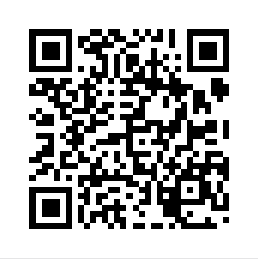